### 자연어 분석

- 형태소 분석
- 구문 분석
- 의미 분석
- 담화 분석 : 최종적 포맷, 자연어를 기계에 인식, 현재 구현엔 한계

담화는 문장과 문장의 관계로 이루어지고, 문장은 어절로 구성, 어절은 단어로 구성된다. 단어는 다시 형태소로 쪼갤 수 있으며 의미를 가진 최소 문법 단위가 된다.

#### 응용 기술
- 검색엔진: 단어의 가중치 기반으로 해서 사용자 의도에 따른 결과 리턴
- 온라인 광고: 검색기록 기반 키워드 도출해 광고와 연계, 키워드 광고시장 생각보다 규모 크다
- 자동번역: 딥러닝 통해 문장을 통째로 번역하는 추세(형태소분석없이)
- 감성분석: sns 데이터 통해 실시간 여론조사의 의미
- 음성인식
- 맞춤법 검사

[77,78]

### KoNLPy

In [4]:
import konlpy
from konlpy.corpus import kolaw, kobill
from konlpy.tag import Hannanum, Kkma, Twitter
from matplotlib import pyplot as plt

In [5]:
kolaw.fileids()

['constitution.txt']

In [14]:
law_corpus = kolaw.open('constitution.txt').read()

In [15]:
law_corpus = law_corpus.split('\n')
len(law_corpus)

357

In [16]:
print(law_corpus[:3])

['대한민국헌법', '', '유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.']


In [9]:
h = Hannanum()

In [17]:
law_text = law_corpus[2]

In [18]:
h.tagset #pos tagging에 사용한 tag set

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [19]:
h.analyze(law_text)[:5] #어절에 대한 형태소 분석의 후보군을 제시

[[[('유구', 'ncps'), ('한', 'ncn')],
  [('유구', 'ncps'), ('하', 'xsms'), ('ㄴ', 'etm')]],
 [[('역사', 'ncn'), ('와', 'jcj')], [('역사', 'ncn'), ('와', 'jct')]],
 [[('전통', 'ncn'), ('에', 'jca')],
  [('전', 'xp'), ('통', 'ncn'), ('에', 'jca')],
  [('절', 'pvg'), ('ㄴ', 'etm'), ('통', 'nbn'), ('에', 'jca')]],
 [[('빛나', 'pvg'), ('는', 'etm')],
  [('빛', 'ncn'), ('나', 'jxc'), ('는', 'jxc')],
  [('빛나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')],
  [('빛나', 'pvg'), ('아', 'ef'), ('는', 'etm')]],
 [[('우리', 'npp')]]]

In [20]:
law_textSplt = law_text.split()

In [21]:
candidates = h.analyze(law_text)

In [22]:
#어절에 맞는 candidates를 출력해보자
for i,t in enumerate(law_textSplt[:5]):
        print(t)
        for c in candidates[i]:
            print("    ",c)
            

유구한
     [('유구', 'ncps'), ('한', 'ncn')]
     [('유구', 'ncps'), ('하', 'xsms'), ('ㄴ', 'etm')]
역사와
     [('역사', 'ncn'), ('와', 'jcj')]
     [('역사', 'ncn'), ('와', 'jct')]
전통에
     [('전통', 'ncn'), ('에', 'jca')]
     [('전', 'xp'), ('통', 'ncn'), ('에', 'jca')]
     [('절', 'pvg'), ('ㄴ', 'etm'), ('통', 'nbn'), ('에', 'jca')]
빛나는
     [('빛나', 'pvg'), ('는', 'etm')]
     [('빛', 'ncn'), ('나', 'jxc'), ('는', 'jxc')]
     [('빛나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')]
     [('빛나', 'pvg'), ('아', 'ef'), ('는', 'etm')]
우리
     [('우리', 'npp')]


In [23]:
h.pos(law_text)[:10] #결정된 pos tag

[('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N')]

In [24]:
h.nouns(law_text)[:10] #키워드로 주로 명사

['유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임시정부', '법통']

In [25]:
k = Kkma()

In [26]:
k.sentences(law_text+"안녕하세요."+"반갑습니다.") #문장단위로 잘라줌

['유구한 역사와 전통에 빛나는 우리 대한 국민은 3·1 운동으로 건립된 대한민국 임시정부의 법통과 불의에 항거한 4·19 민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의· 인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유 민주적 기본질서를 더욱 확고히 하여 정치· 경제· 사회· 문화의 모든 영역에 있어서 각인의 기회를 균등 히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류 공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '안녕하세요.',
 '반갑습니다.']

In [27]:
k.nouns(law_text)[:10]

['유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립']

In [28]:
t = Twitter()

In [29]:
t.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [30]:
t.pos(law_text)[:10]

[('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대한', 'Noun'),
 ('국민', 'Noun')]

#### Heap's law

In [31]:
law_corpusStr = ''.join(law_corpus)
law_nounList = t.nouns(law_corpusStr)
len(law_nounList)

3779

In [33]:
global_unique = []; global_unique_count=[]

In [34]:
for row in law_corpus:
    terms = t.nouns(row)
    unique = set(terms)
    if len(unique)>0:
        global_unique += list(unique)
    global_unique = list(set(global_unique))
    global_unique_count.append(len(global_unique)) 

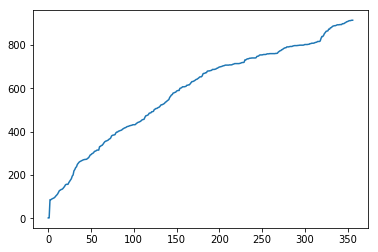

In [35]:
plt.plot(global_unique_count)

### NLTK: Natural Language Toolkit

In [39]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
from matplotlib import font_manager, rc

In [92]:
files = gutenberg.fileids()
files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [40]:
emma = gutenberg.open("austen-emma.txt").read()
emma[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

In [41]:
emma_sents = sent_tokenize(emma) #문장단위로 토큰화

In [42]:
len(emma_sents)

7493

In [43]:
print(emma_sents[1])

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [44]:
emma_words = word_tokenize(emma_sents[1]) #단어단위 토큰화
emma_words

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [45]:
p = r"([a-zA-Z0-9]+)+" #한글 단어 처리하고싶으면 [가-히]

In [46]:
emma_retokens = regexp_tokenize(emma_sents[1], p) #정규식을 이용한 단어 토큰화
emma_retokens

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period']

In [47]:
emma_text = nltk.Text(emma_retokens)

In [48]:
emma_text.vocab() #freq dic 을 반환

FreqDist({'She': 1,
          'a': 2,
          'affectionate': 1,
          'and': 1,
          'been': 1,
          'consequence': 1,
          'daughters': 1,
          'early': 1,
          'father': 1,
          'from': 1,
          'had': 1,
          'her': 1,
          'his': 1,
          'house': 1,
          'in': 1,
          'indulgent': 1,
          'marriage': 1,
          'mistress': 1,
          'most': 1,
          'of': 4,
          'period': 1,
          's': 1,
          'sister': 1,
          'the': 2,
          'two': 1,
          'very': 1,
          'was': 1,
          'youngest': 1})

### 한글에 nltk적용

In [49]:
law_corpus = kolaw.open(kolaw.fileids()[0]).read()

In [50]:
kotokens = k.morphs(law_corpus) #tag 없이 형태소 구분 결과만 가져오는 morphs

In [51]:
len(kotokens)

10053

In [52]:
kotext = nltk.Text(kotokens) #한글 토큰을 nltk로 분석하겠다

In [54]:
# 한글 단어의 freq를 뽑아준다
# val인 freq 내림차순으로 정렬했다 15개만추출
sorted(kotext.vocab(), key = lambda k: kotext.vocab()[k], reverse=True )[:15]


['의', '하', '.', '에', '는', 'ㄴ다', 'ㄴ', '을', '은', '이', '저', '여', '·', 'ㄹ', '조']

In [55]:
#한글폰트 지정필요
font = font_manager.FontProperties(fname="C:\\WINDOWS\\Fonts\\NanumSquareL.ttf").get_name()

In [56]:
rc("font", family=font)

In [57]:
type(kotext) #nltk.text.Text 에 대해 plotting 가능

nltk.text.Text

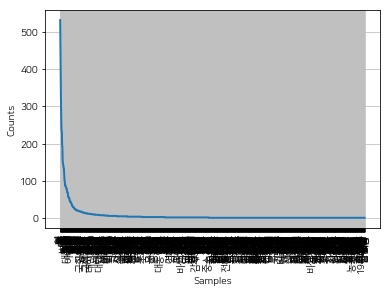

In [167]:
kotext.plot() #counts 가 급격히 감소함을 알수있다

In [160]:
kotext.count('헌법')

69

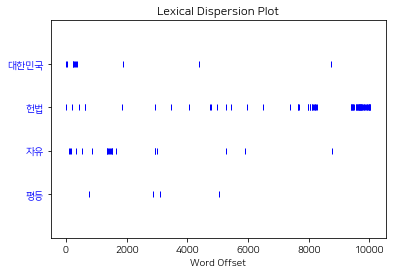

In [170]:
# 단어의 분포
kotext.dispersion_plot(['대한민국','헌법','자유','평등'])

In [175]:
kobillList = [kobill.open(i).read() for i in kobill.fileids()]

In [183]:
bill_nouns = [k.nouns(i) for i in kobillList]

In [180]:
bill_nouns_total = []
for el in bill_nouns:
    bill_nouns_total.extend(el)

In [181]:
bill_nouns_total_text = nltk.Text(bill_nouns_total)

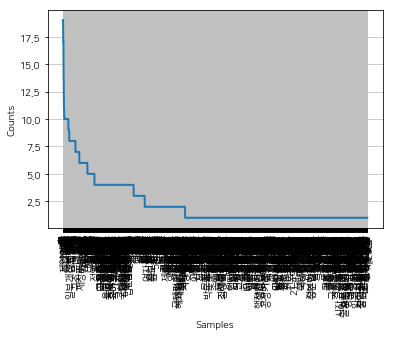

In [182]:
bill_nouns_total_text.plot()

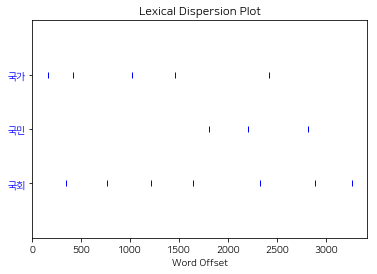

In [185]:
bill_nouns_total_text.dispersion_plot(['국가','국민','국회'])

In [186]:
# 위치찾기
bill_nouns_total_text.concordance("국민",lines=10)

Displaying 3 of 3 matches:
 과정 이수 실정 4 4년 년 저 간호 필요성 선진 각국 경향 고려 국민 의료 서비스 제공 대통령령 일정 기준 충족 간호과 과 수업 수업연한
 제안이유 이유 현행법 입법 입법예고 예고 행정예고 정책 결정 과정 국민 여의 절차 규정 하나 실제 집행 평가 단계 근본 근본적인 적인 참여
주요 주요내용 내용 특수 특수전 전 연합 연합훈련 연습 유사시 우리 국민 보호 보호임 임 파견규모 규모 150 150명 명 이내 파견지역 아


In [195]:
# 유사 분포 단어 찾기(의미정보아님) 함께 많이 나온 단어(공기정보)

kotext.similar("국민")

저 국가 법관 법원 대통령 대한민국 정부 조국 국회 공무원 재판 타인 판결 근로 여자 국회의원 법률안 법령 농지 운동


### Ngrams

In [1]:
def ngrams(source, n=2):
    tokens = source.split()
    
    result =[]
    for i in range(len(tokens)):
        grams.append(tokens[i:i+n])
        
    return result

In [66]:
ngrams("가 나 다 라")

[['가', '나'], ['나', '다'], ['다', '라'], ['라']]

### 불용어처리

In [58]:
# 비속어 처리
stopwords = ['시발','씨발'] 

In [ ]:
# 시~발련아^^ 어떻게 처리할것인가

In [70]:
import re

In [74]:
rowString = "시~발련아^^ 시1발련아^^ 시!@#%발@##련아^^"

for src in rowString.split():
    print("제거 전: ", src)
    src = re.sub("[^ㄱ-ㅎ|ㅏ-ㅣ|가-힝]","",src)
    print("제거 후:",src)

제거 전:  시~발련아^^
제거 후: 시발련아
제거 전:  시1발련아^^
제거 후: 시발련아
제거 전:  시!@#%발@##련아^^
제거 후: 시발련아
